
=== Summary for Non-Occupational Riders ===
              Age  Educational Attainment  Monthly Income  Training in Riding  \
count  194.000000              194.000000      194.000000          194.000000   
mean    33.896907                0.938144        3.860825            0.536082   
std      9.254025                1.744358        1.900698            0.499987   
min     19.000000                0.000000        0.000000            0.000000   
25%     26.000000                0.000000        3.000000            0.000000   
50%     32.500000                0.000000        5.000000            1.000000   
75%     40.000000                1.000000        5.000000            1.000000   
max     62.000000                5.000000        5.000000            1.000000   

       Years of Having License  Traffic Violation  Accident in Motorcycle  
count               194.000000         194.000000              194.000000  
mean                  9.355309           0.097938                0.268041

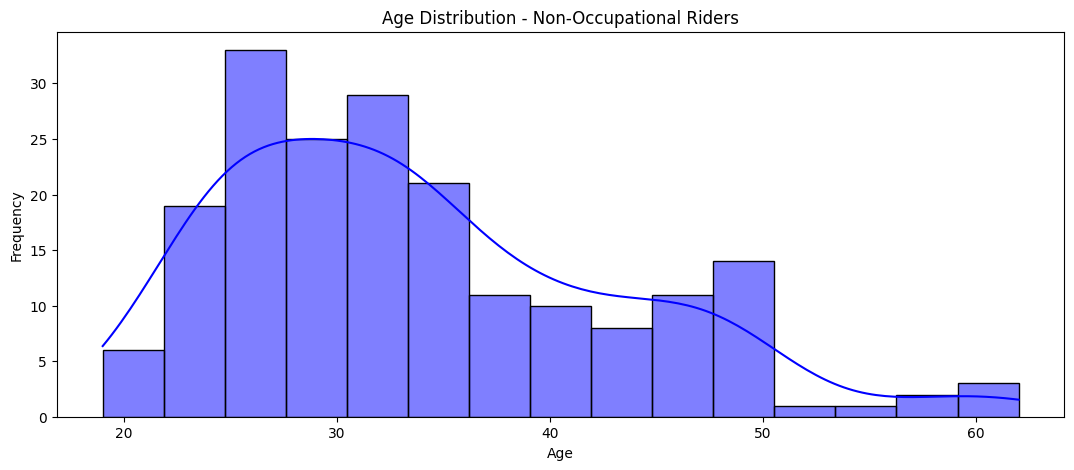

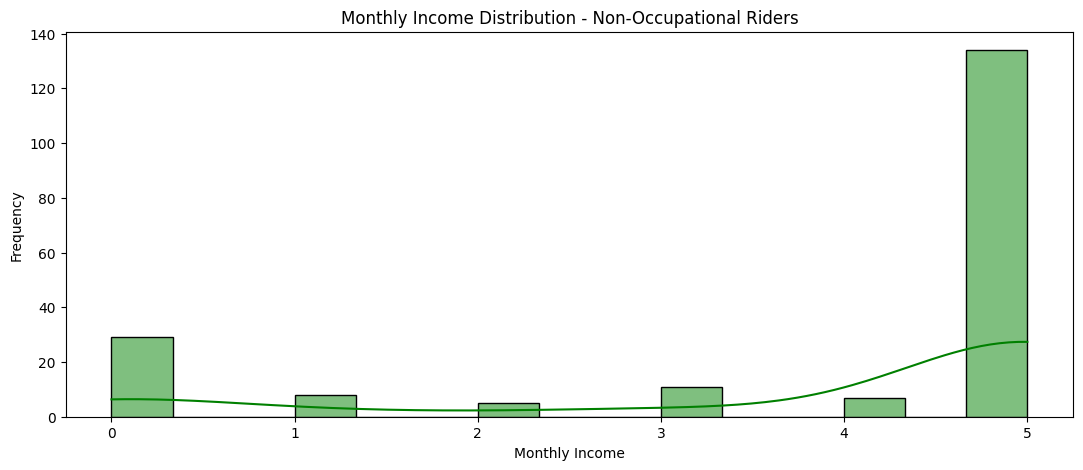

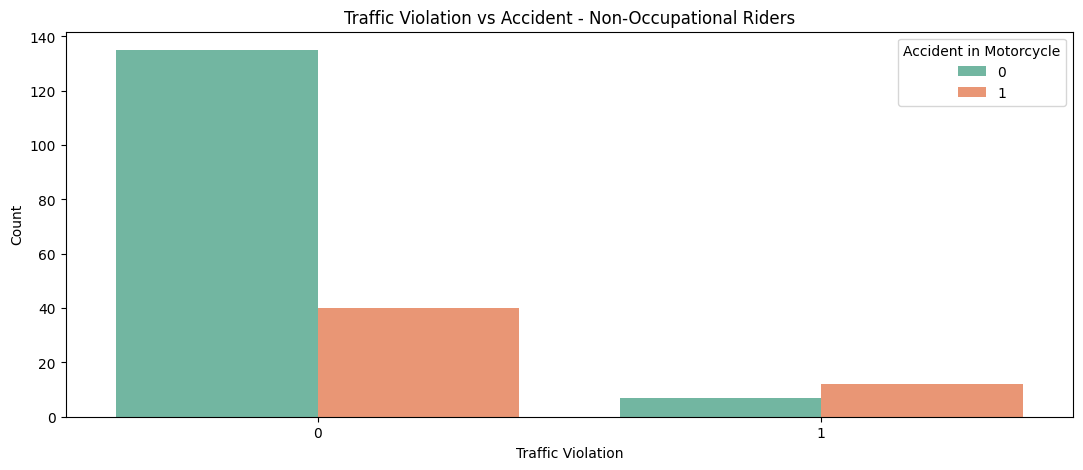


Generating visualizations for Occupational Riders...


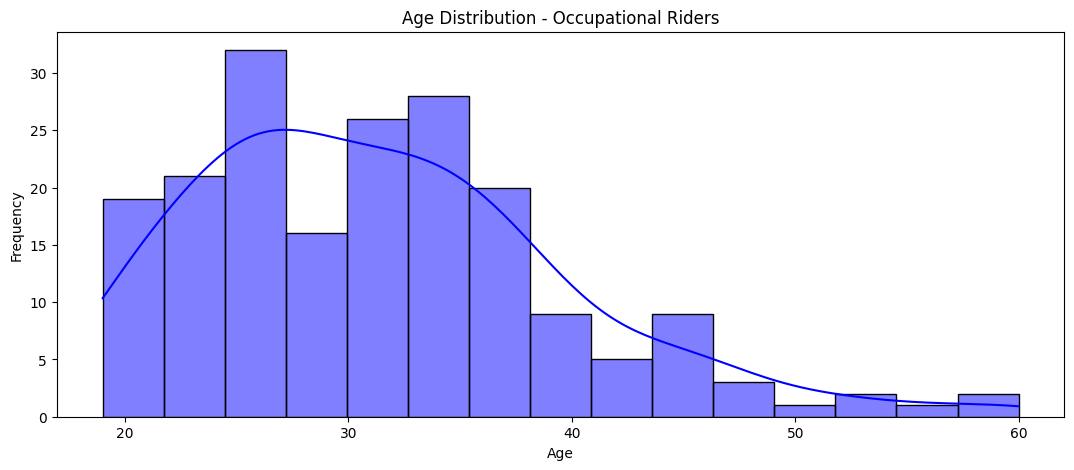

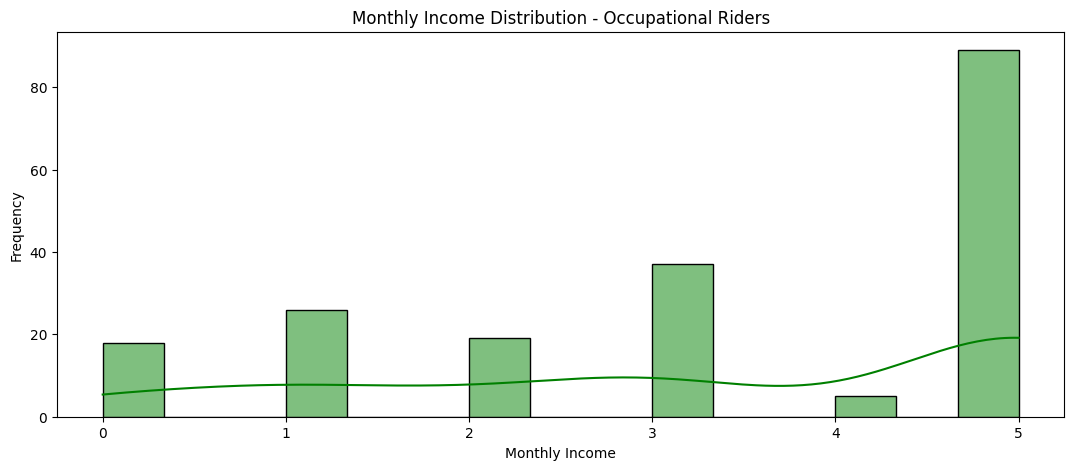

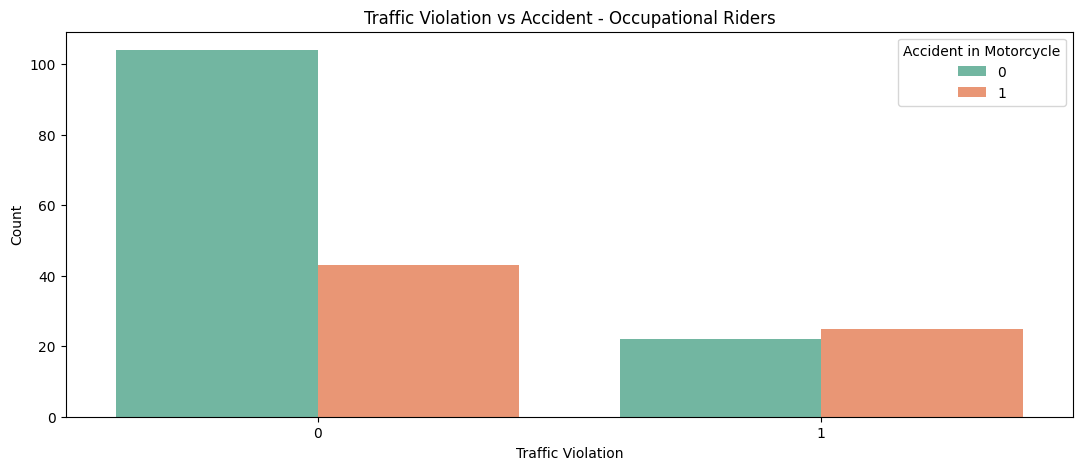


=== Correlation Matrix for Non-Occupational Riders ===
                           Age  Educational Attainment  Monthly Income  \
Age                      1.000                  -0.039          -0.072   
Educational Attainment  -0.039                   1.000          -0.253   
Monthly Income          -0.072                  -0.253           1.000   
Training in Riding      -0.183                  -0.176          -0.019   
Years of Having License  0.623                  -0.161           0.010   
Traffic Violation       -0.055                   0.121          -0.031   
Accident in Motorcycle   0.042                   0.075          -0.103   

                         Training in Riding  Years of Having License  \
Age                                  -0.183                    0.623   
Educational Attainment               -0.176                   -0.161   
Monthly Income                       -0.019                    0.010   
Training in Riding                    1.000                   -

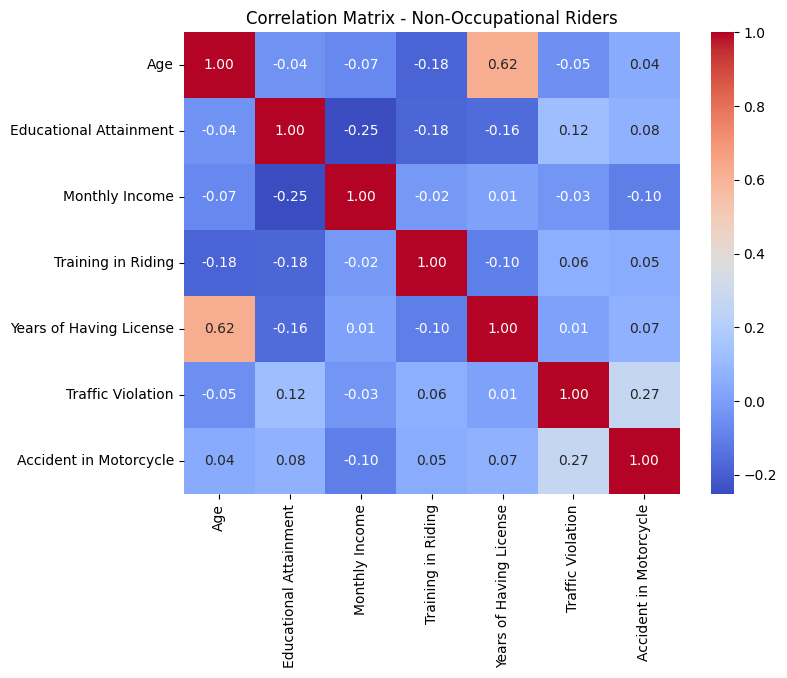


=== Correlation Matrix for Occupational Riders ===
                           Age  Educational Attainment  Monthly Income  \
Age                      1.000                  -0.060           0.111   
Educational Attainment  -0.060                   1.000          -0.079   
Monthly Income           0.111                  -0.079           1.000   
Training in Riding      -0.133                   0.092           0.016   
Years of Having License  0.671                  -0.073           0.072   
Years as a Rider         0.226                  -0.183           0.055   
Traffic Violation       -0.041                   0.172           0.006   
Accident in Motorcycle  -0.028                   0.037          -0.092   

                         Training in Riding  Years of Having License  \
Age                                  -0.133                    0.671   
Educational Attainment                0.092                   -0.073   
Monthly Income                        0.016                    0.

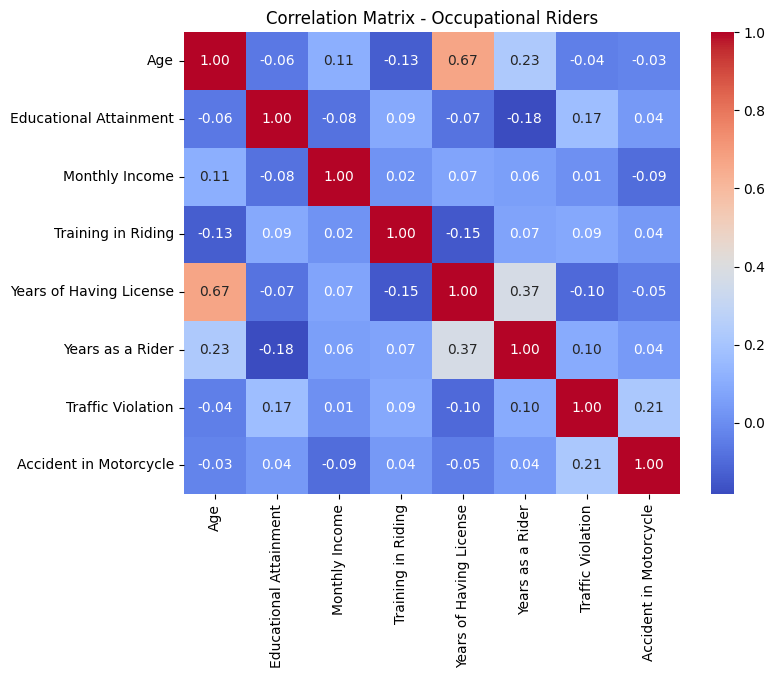


📊 SEM Estimates:

SEM Output Columns:
Index(['lval', 'op', 'rval', 'Estimate', 'Std. Err', 'z-value', 'p-value'], dtype='object')

Full SEM Estimates:
                     lval  op                     rval  Estimate  Std. Err  \
0          Monthly_Income   ~                      Age  0.024853  0.021102   
1          Monthly_Income   ~   Educational_Attainment -0.072737  0.066152   
2          Monthly_Income   ~       Training_in_Riding  0.158059  0.318953   
3          Monthly_Income   ~  Years_of_Having_License -0.000829  0.029933   
4          Monthly_Income   ~        Traffic_Violation  0.090141  0.305221   
5  Accident_in_Motorcycle   ~           Monthly_Income -0.024381  0.018541   
6  Accident_in_Motorcycle   ~        Traffic_Violation  0.237917  0.078084   
7  Accident_in_Motorcycle   ~  Years_of_Having_License -0.001491  0.005773   
8          Monthly_Income  ~~           Monthly_Income  3.177399  0.322616   
9  Accident_in_Motorcycle  ~~   Accident_in_Motorcycle  0.214922  0.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from semopy import Model
import warnings
warnings.filterwarnings("ignore")

# === Load Excel File ===
file_path = "file.xlsx"  # Replace with your actual path
non_occu_data = pd.read_excel(file_path, sheet_name="NON-OCCU DEMOGRAPHIC")
occu_data = pd.read_excel(file_path, sheet_name="OCCU DEMOGRAPHIC")

# === Select relevant features ===
non_occu_features = [
    'Age',
    'Educational Attainment',
    'Monthly Income',
    'Training in Riding',
    'Years of Having License',
    'Traffic Violation',
    'Accident in Motorcycle'
]

occu_features = [
    'Age',
    'Educational Attainment',
    'Monthly Income',
    'Training in Riding',
    'Years of Having License',
    'Years as a Rider',
    'Traffic Violation',
    'Accident in Motorcycle'
]

non_occu_df = non_occu_data[non_occu_features]
occu_df = occu_data[occu_features]

# === Encode categorical variables ===
from sklearn.preprocessing import LabelEncoder

def encode_categoricals(df):
    le_dict = {}
    for col in df.columns:
        if df[col].dtype == "object" or df[col].dtype.name == "category":
            le = LabelEncoder()
            df[col] = df[col].astype(str)
            df[col] = le.fit_transform(df[col])
            le_dict[col] = le
    return df, le_dict

non_occu_df, _ = encode_categoricals(non_occu_df)
occu_df, _ = encode_categoricals(occu_df)

# === Summary Function ===
def summarize_data(df, label):
    print(f"\n=== Summary for {label} ===")
    print(df.describe(include='all'))
    print("\n")

summarize_data(non_occu_df, "Non-Occupational Riders")
summarize_data(occu_df, "Occupational Riders")

# === Visualization ===
def visualize_data(df, label):
    print(f"\nGenerating visualizations for {label}...")

    plt.figure(figsize=(13, 5))
    sns.histplot(df['Age'].dropna(), kde=True, bins=15, color='blue')
    plt.title(f"Age Distribution - {label}")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

    plt.figure(figsize=(13, 5))
    sns.histplot(df['Monthly Income'].dropna(), kde=True, bins=15, color='green')
    plt.title(f"Monthly Income Distribution - {label}")
    plt.xlabel("Monthly Income")
    plt.ylabel("Frequency")
    plt.show()

    if 'Accident in Motorcycle' in df.columns:
        plt.figure(figsize=(13, 5))
        sns.countplot(data=df, x='Traffic Violation', hue='Accident in Motorcycle', palette='Set2')
        plt.title(f"Traffic Violation vs Accident - {label}")
        plt.xlabel("Traffic Violation")
        plt.ylabel("Count")
        plt.legend(title="Accident in Motorcycle")
        plt.show()

visualize_data(non_occu_df, "Non-Occupational Riders")
visualize_data(occu_df, "Occupational Riders")

# === Correlation Analysis ===
def correlation_analysis(df, label):
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    if not numeric_df.empty:
        corr = numeric_df.corr()
        print(f"\n=== Correlation Matrix for {label} ===")
        print(corr.round(3))

        plt.figure(figsize=(8, 6))
        sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title(f"Correlation Matrix - {label}")
        plt.show()
    else:
        print(f"No numeric data to correlate for {label}")

correlation_analysis(non_occu_df, "Non-Occupational Riders")
correlation_analysis(occu_df, "Occupational Riders")

# === SEM Model ===
# Define a basic SEM model based on observed relationships
model_desc = """
# Measurement model (if latent variables were used, define here)
# Structural model
Monthly_Income ~ Age + Educational_Attainment + Training_in_Riding + Years_of_Having_License + Traffic_Violation
Accident_in_Motorcycle ~ Monthly_Income + Traffic_Violation + Years_of_Having_License
"""

# Fix column names for SEM use (remove spaces)
df_sem = occu_df.copy()
df_sem.columns = df_sem.columns.str.replace(" ", "_").str.replace("-", "_")

# Fit SEM model
model = Model(model_desc)
model.load_dataset(df_sem)
model.fit()



# === Display SEM Results ===
print("\n📊 SEM Estimates:")
estimates = model.inspect()
print("\nSEM Output Columns:")
print(estimates.columns)  # Check available columns
print("\nFull SEM Estimates:")
print(estimates)


# Optional: visualize path diagram (textual)
try:
    from semopy.examples import plot_model
    graph = plot_model(model)
    graph.format = 'png'
    graph.render('sem_model_diagram', view=True)
except Exception:
    print("Path diagram visualization skipped (Graphviz may be missing).")

print("\n✅ SEM analysis complete.")


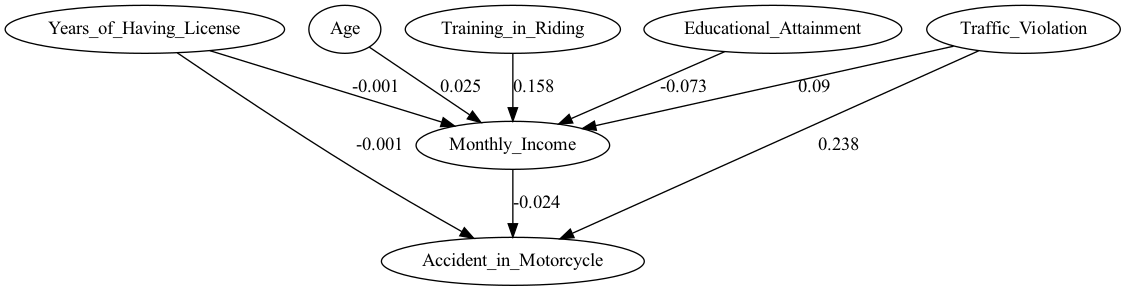

In [3]:
from graphviz import Digraph
from semopy import Model
import pandas as pd

# === Reuse your fitted model ===
# Make sure `model` and `df_sem` are defined and fitted

# Inspect path estimates
estimates = model.inspect()
edges = estimates[estimates['op'] == '~']  # Regression paths

# Initialize Graphviz Digraph
dot = Digraph(format='png')
dot.attr('node', shape='ellipse')

# Add nodes
variables = set(edges['lval']).union(set(edges['rval']))
for var in variables:
    dot.node(var)

# Add directed edges (paths)
for _, row in edges.iterrows():
    source = row['rval']
    target = row['lval']
    estimate = round(row['Estimate'], 3)
    dot.edge(source, target, label=str(estimate))

# Render and display
dot.render('sem_path_diagram', view=False)
from IPython.display import Image, display
display(Image(filename='sem_path_diagram.png'))




In [4]:
# === SEM ANALYSIS CELL ===

from semopy import Model
import pandas as pd

# === Step 1: Prepare Data ===
# Fix column names (remove spaces and replace with underscores for SEM syntax)
df_sem = occu_df.copy()
df_sem.columns = df_sem.columns.str.replace(" ", "_").str.replace("-", "_")

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

for col in df_sem.columns:
    if df_sem[col].dtype == "object" or df_sem[col].dtype.name == "category":
        le = LabelEncoder()
        df_sem[col] = le.fit_transform(df_sem[col].astype(str))

# === Step 2: Define SEM Model ===
model_desc = """
Monthly_Income ~ Age + Educational_Attainment + Training_in_Riding + Years_of_Having_License + Traffic_Violation
Accident_in_Motorcycle ~ Monthly_Income + Traffic_Violation + Years_of_Having_License
"""

# === Step 3: Fit the SEM Model ===
model = Model(model_desc)
model.load_dataset(df_sem)
model.fit()

# === Step 4: Output SEM Estimates ===
print("\n📊 SEM Estimates:")
estimates = model.inspect()
print(estimates[['lval', 'op', 'rval', 'Estimate', 'Std. Err', 'z-value', 'p-value']])

# === Step 5: Optional - Visualize SEM Path Diagram (Requires Graphviz Installed) ===
try:
    from semopy.plotting import semplot
    import graphviz
    from IPython.display import display, Image

    g = semplot(model)
    g.format = 'png'
    g.render('sem_model_diagram', view=False)
    display(Image(filename='sem_model_diagram.png'))
except Exception as e:
    print("⚠️ SEM path diagram could not be rendered:", e)



📊 SEM Estimates:
                     lval  op                     rval  Estimate  Std. Err  \
0          Monthly_Income   ~                      Age  0.024853  0.021102   
1          Monthly_Income   ~   Educational_Attainment -0.072737  0.066152   
2          Monthly_Income   ~       Training_in_Riding  0.158059  0.318953   
3          Monthly_Income   ~  Years_of_Having_License -0.000829  0.029933   
4          Monthly_Income   ~        Traffic_Violation  0.090141  0.305221   
5  Accident_in_Motorcycle   ~           Monthly_Income -0.024381  0.018541   
6  Accident_in_Motorcycle   ~        Traffic_Violation  0.237917  0.078084   
7  Accident_in_Motorcycle   ~  Years_of_Having_License -0.001491  0.005773   
8          Monthly_Income  ~~           Monthly_Income  3.177399  0.322616   
9  Accident_in_Motorcycle  ~~   Accident_in_Motorcycle  0.214922  0.021822   

    z-value   p-value  
0  1.177771  0.238888  
1 -1.099554  0.271526  
2  0.495555  0.620209  
3 -0.027688  0.977911  
4  

OCCU Demographic vs KA Score

Spearman Correlation Matrix: OCCU
                    Age  Education    Income  Training  License_Years  \
Age            1.000000  -0.075062  0.138563 -0.104956       0.674509   
Education     -0.075062   1.000000 -0.052327  0.086579      -0.144091   
Income         0.138563  -0.052327  1.000000  0.016826       0.057481   
Training      -0.104956   0.086579  0.016826  1.000000      -0.104533   
License_Years  0.674509  -0.144091  0.057481 -0.104533       1.000000   
Violations    -0.038283   0.140157  0.011939  0.086431      -0.085793   
Accidents     -0.014485   0.023920 -0.085871  0.036283      -0.009012   
KA_Score       0.023829  -0.097445  0.052684 -0.196452       0.098191   

               Violations  Accidents  KA_Score  
Age             -0.038283  -0.014485  0.023829  
Education        0.140157   0.023920 -0.097445  
Income           0.011939  -0.085871  0.052684  
Training         0.086431   0.036283 -0.196452  
License_Years   -0.085793  -0.009

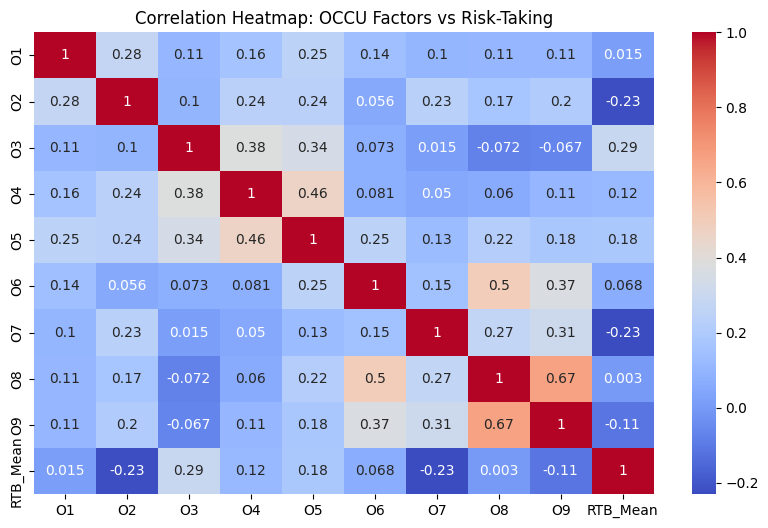


[NON-OCCU] OCCUPATIONAL FACTORS vs MRBQ:

Correlation Between NON-OCCU Factors and Risk-Taking:
                O1        O2        O3        O4        O5        O6  \
O1        1.000000 -0.022349  0.266420  0.144708  0.268724 -0.140689   
O2       -0.022349  1.000000  0.275700  0.226224  0.071144  0.075801   
O3        0.266420  0.275700  1.000000  0.469916  0.210402 -0.059365   
O4        0.144708  0.226224  0.469916  1.000000  0.263062  0.035066   
O5        0.268724  0.071144  0.210402  0.263062  1.000000 -0.006962   
O6       -0.140689  0.075801 -0.059365  0.035066 -0.006962  1.000000   
O7       -0.094938  0.488899  0.339397  0.303466  0.122898  0.075642   
O8       -0.062808  0.404750  0.290715  0.234696  0.094427  0.168198   
RTB_Mean  0.083623 -0.130820 -0.059269 -0.048342  0.124033 -0.185803   

                O7        O8  RTB_Mean  
O1       -0.094938 -0.062808  0.083623  
O2        0.488899  0.404750 -0.130820  
O3        0.339397  0.290715 -0.059269  
O4        0.303466

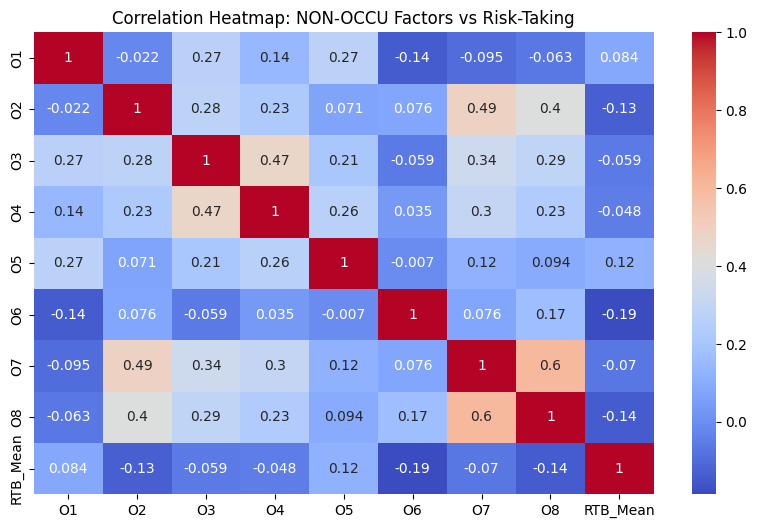


🔍 Performing Factor Analysis (OCCU FACTORS)
Factor Loadings (Top 2 Factors):
    Factor 1  Factor 2
O1 -0.196327  0.238767
O2 -0.281932  0.279525
O3 -0.060047  0.539808
O4 -0.216724  0.650689
O5 -0.396701  0.599547
O6 -0.545418 -0.012459
O7 -0.370359  0.011120
O8 -0.871761 -0.176479
O9 -0.751011 -0.120322

📐 Performing SEM Analysis (OCCU Demographics to KA and Accidents)

SEM Estimates:
         lval  op           rval  Estimate  Std. Err   z-value   p-value
0    KA_Score   ~            Age  0.000346  0.010150  0.034135  0.972770
1    KA_Score   ~      Education -0.030989  0.031805 -0.974328  0.329894
2    KA_Score   ~         Income  0.021660  0.034410  0.629465  0.529045
3    KA_Score   ~       Training -0.322711  0.152973 -2.109595  0.034893
4    KA_Score   ~  License_Years  0.005627  0.014347  0.392203  0.694908
5    KA_Score   ~     Violations -0.327909  0.146326 -2.240947  0.025030
6   Accidents   ~       KA_Score  0.063994  0.038259  1.672647  0.094397
7   Accidents   ~     Vio

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import spearmanr


# Add these imports at the top
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import FactorAnalysis
from semopy import Model
import warnings
warnings.filterwarnings("ignore")

# Load Excel Workbook
file_path = 'file.xlsx'  # replace with your actual file path
xl = pd.ExcelFile(file_path)

# Load required sheets
occu_demo = xl.parse('OCCU DEMOGRAPHIC')
nonoccu_demo = xl.parse('NON-OCCU DEMOGRAPHIC')
occu_ra = xl.parse('OCCU RA')
nonoccu_ra = xl.parse('NON-OCCU RA')
occu_mrbq = xl.parse('OCCU MRBQ')
nonoccu_mrbq = xl.parse('NON-OCCU MRBQ')
occu_factors = xl.parse('OCCU Occu Factors')
nonoccu_factors = xl.parse('NON-OCCU Occu Factors')

# Helper to get the correct KA column
def get_ka_column(df):
    for col in df.columns:
        if 'KA' in col.upper():
            return col
    raise ValueError("KA Score column not found. Please check the sheet.")

# Get correct column names for KA Score
occu_ka_column = get_ka_column(occu_ra)
nonoccu_ka_column = get_ka_column(nonoccu_ra)

# =============================
# 1. DEMOGRAPHICS TO KNOWLEDGE
# =============================

def preprocess_demo_ka(df_demo, ka_scores, mapping):
    df = df_demo.iloc[:, mapping]
    df.columns = ['Age', 'Education', 'Income', 'Training', 'License_Years', 'Violations', 'Accidents']
    df['KA_Score'] = ka_scores
    return df.dropna()

# OCCU: A (0), D (3), E (4), I (8), K (10), P (15), Q (16)
occu_data = preprocess_demo_ka(occu_demo, occu_ra[occu_ka_column], [0, 3, 4, 8, 10, 15, 16])
# NON-OCCU: A (0), D (3), E (4), F (5), H (7), L (11), M (12)
nonoccu_data = preprocess_demo_ka(nonoccu_demo, nonoccu_ra[nonoccu_ka_column], [0, 3, 4, 5, 7, 11, 12])

# Encode categorical variables before correlation
def encode_and_correlate(df, label=""):
    df_encoded = df.copy()
    for col in df_encoded.columns:
        if df_encoded[col].dtype == 'object':
            df_encoded[col] = df_encoded[col].astype('category').cat.codes

    print(f"\nSpearman Correlation Matrix: {label}")
    print(df_encoded.corr(method='spearman'))

print("OCCU Demographic vs KA Score")
encode_and_correlate(occu_data, "OCCU")

print("\nNON-OCCU Demographic vs KA Score")
encode_and_correlate(nonoccu_data, "NON-OCCU")

# =========================================
# 2. KNOWLEDGE ASSESSMENT TO RISK-TAKING
# =========================================

def regression_ka_to_rtb(ka_scores, mrbq_df, label=""):
    mrbq_df_cleaned = mrbq_df.dropna()
    y = mrbq_df_cleaned.mean(axis=1)
    x = ka_scores.loc[y.index]
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    print(f"\nRegression Summary (KA → Risk-Taking) [{label}]:")
    print(model.summary())

print("\n[OCCU] KA Score to MRBQ:")
regression_ka_to_rtb(occu_ra[occu_ka_column], occu_mrbq, "OCCU")

print("\n[NON-OCCU] KA Score to MRBQ:")
regression_ka_to_rtb(nonoccu_ra[nonoccu_ka_column], nonoccu_mrbq, "NON-OCCU")

# ============================================
# 3. OCCUPATIONAL FACTORS TO RISK-TAKING
# ============================================

def analyze_factors_to_rtb(factor_df, mrbq_df, label=""):
    df = factor_df.copy()
    df['RTB_Mean'] = mrbq_df.mean(axis=1)
    df = df.dropna()
    print(f"\nCorrelation Between {label} Factors and Risk-Taking:")
    print(df.corr(method='spearman'))

    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm')
    plt.title(f"Correlation Heatmap: {label} Factors vs Risk-Taking")
    plt.show()

print("\n[OCCU] OCCUPATIONAL FACTORS vs MRBQ:")
analyze_factors_to_rtb(occu_factors, occu_mrbq, "OCCU")

print("\n[NON-OCCU] OCCUPATIONAL FACTORS vs MRBQ:")
analyze_factors_to_rtb(nonoccu_factors, nonoccu_mrbq, "NON-OCCU")

# =============================================
# 4. FACTOR ANALYSIS (using OCCU OCCUPATIONAL FACTORS)
# =============================================
print("\n🔍 Performing Factor Analysis (OCCU FACTORS)")

# Standardize data for factor analysis
occu_factors_clean = occu_factors.dropna()
scaler = StandardScaler()
occu_factors_scaled = scaler.fit_transform(occu_factors_clean)

# Fit Factor Analysis (you can adjust n_components as needed)
fa = FactorAnalysis(n_components=2, random_state=0)
fa.fit(occu_factors_scaled)

print("Factor Loadings (Top 2 Factors):")
loadings = pd.DataFrame(fa.components_.T,
                        index=occu_factors.columns,
                        columns=['Factor 1', 'Factor 2'])
print(loadings)

# =============================================
# 5. STRUCTURAL EQUATION MODELING (SEM ANALYSIS)
# =============================================
print("\n📐 Performing SEM Analysis (OCCU Demographics to KA and Accidents)")

# Prepare SEM data
df_sem = occu_data.copy()  # from earlier KA correlation step
for col in df_sem.columns:
    if df_sem[col].dtype == 'object':
        df_sem[col] = LabelEncoder().fit_transform(df_sem[col].astype(str))

# SEM model description
model_desc = """
KA_Score ~ Age + Education + Income + Training + License_Years + Violations
Accidents ~ KA_Score + Violations + License_Years
"""

# Fit the SEM model
sem_model = Model(model_desc)
sem_model.load_dataset(df_sem)
sem_model.fit()

# Output SEM estimates
print("\nSEM Estimates:")
estimates = sem_model.inspect()
print(estimates[['lval', 'op', 'rval', 'Estimate', 'Std. Err', 'z-value', 'p-value']])



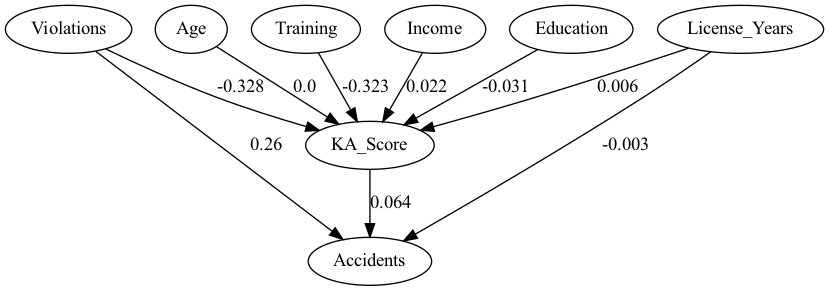


🔍 Performing Factor Analysis (NON-OCCU FACTORS)
Factor Loadings (Top 2 Factors):
    Factor 1  Factor 2
O1 -0.108886  0.450685
O2 -0.616830  0.006835
O3 -0.563883  0.462989
O4 -0.498027  0.356176
O5 -0.246009  0.262905
O6 -0.194489 -0.280183
O7 -0.840266 -0.188372
O8 -0.748057 -0.172634

📐 Performing SEM Analysis (NON-OCCU Demographics to KA and Accidents)

SEM Estimates (NON-OCCU):
         lval  op           rval  Estimate  Std. Err   z-value   p-value
0    KA_Score   ~            Age  0.006648  0.008247  0.806127  0.420170
1    KA_Score   ~      Education -0.006112  0.036287 -0.168431  0.866244
2    KA_Score   ~         Income -0.074215  0.032053 -2.315382  0.020592
3    KA_Score   ~       Training  0.151607  0.121981  1.242866  0.213917
4    KA_Score   ~  License_Years  0.010564  0.010062  1.049948  0.293742
5    KA_Score   ~     Violations  0.028697  0.199298  0.143993  0.885506
6   Accidents   ~       KA_Score  0.033922  0.036738  0.923332  0.355834
7   Accidents   ~     Violati

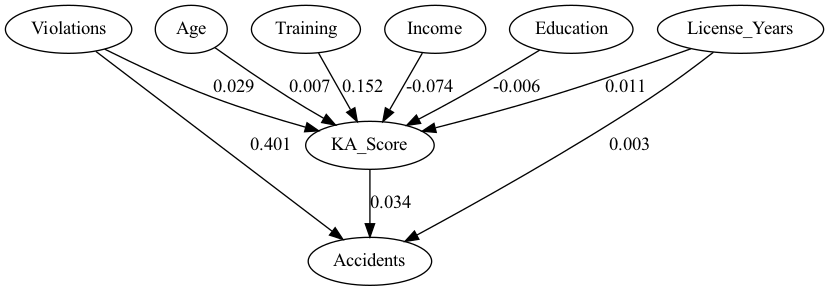

In [6]:
from graphviz import Digraph
from semopy import Model
import pandas as pd

# === Reuse your fitted model ===
# Make sure `model` and `df_sem` are defined and fitted

# Inspect path estimates
estimates = sem_model.inspect()
edges = estimates[estimates['op'] == '~']  # Regression paths

# Initialize Graphviz Digraph
dot = Digraph(format='png')
dot.attr('node', shape='ellipse')

# Add nodes
variables = set(edges['lval']).union(set(edges['rval']))
for var in variables:
    dot.node(var)

# Add directed edges (paths)
for _, row in edges.iterrows():
    source = row['rval']
    target = row['lval']
    estimate = round(row['Estimate'], 3)
    dot.edge(source, target, label=str(estimate))

# Render and display
dot.render('sem_path_diagram', view=False)
from IPython.display import Image, display
display(Image(filename='sem_path_diagram.png'))


# 5. FACTOR ANALYSIS AND SEM (NON-OCCU OCCUPATIONAL FACTORS)
# =============================================
print("\n🔍 Performing Factor Analysis (NON-OCCU FACTORS)")

# Standardize data for factor analysis
nonoccu_factors_clean = nonoccu_factors.dropna()
scaler = StandardScaler()
nonoccu_factors_scaled = scaler.fit_transform(nonoccu_factors_clean)

# Fit Factor Analysis (adjust n_components as needed)
fa = FactorAnalysis(n_components=2, random_state=0)
fa.fit(nonoccu_factors_scaled)

print("Factor Loadings (Top 2 Factors):")
nonoccu_loadings = pd.DataFrame(fa.components_.T,
                                index=nonoccu_factors.columns,
                                columns=['Factor 1', 'Factor 2'])
print(nonoccu_loadings)

# =============================================
# 6. STRUCTURAL EQUATION MODELING (SEM ANALYSIS)
# =============================================
print("\n📐 Performing SEM Analysis (NON-OCCU Demographics to KA and Accidents)")

# Prepare SEM data
df_sem_nonoccu = nonoccu_data.copy()
for col in df_sem_nonoccu.columns:
    if df_sem_nonoccu[col].dtype == 'object':
        df_sem_nonoccu[col] = LabelEncoder().fit_transform(df_sem_nonoccu[col].astype(str))

# SEM model description
model_desc_nonoccu = """
KA_Score ~ Age + Education + Income + Training + License_Years + Violations
Accidents ~ KA_Score + Violations + License_Years
"""

# Fit the SEM model
sem_model_nonoccu = Model(model_desc_nonoccu)
sem_model_nonoccu.load_dataset(df_sem_nonoccu)
sem_model_nonoccu.fit()

# Output SEM estimates
print("\nSEM Estimates (NON-OCCU):")
estimates_nonoccu = sem_model_nonoccu.inspect()
print(estimates_nonoccu[['lval', 'op', 'rval', 'Estimate', 'Std. Err', 'z-value', 'p-value']])

# === Reuse your fitted model ===
# Make sure `model` and `df_sem` are defined and fitted

# Inspect path estimates
estimates = sem_model_nonoccu.inspect()
edges = estimates[estimates['op'] == '~']  # Regression paths

# Initialize Graphviz Digraph
dot = Digraph(format='png')
dot.attr('node', shape='ellipse')

# Add nodes
variables = set(edges['lval']).union(set(edges['rval']))
for var in variables:
    dot.node(var)

# Add directed edges (paths)
for _, row in edges.iterrows():
    source = row['rval']
    target = row['lval']
    estimate = round(row['Estimate'], 3)
    dot.edge(source, target, label=str(estimate))

# Render and display
dot.render('sem_path_diagram', view=False)
from IPython.display import Image, display
display(Image(filename='sem_path_diagram.png'))


🔍 Performing Factor Analysis (OCCU FACTORS)
Factor Loadings (Top 2 Factors):
    Factor 1  Factor 2
O1 -0.196327  0.238767
O2 -0.281932  0.279525
O3 -0.060047  0.539808
O4 -0.216724  0.650689
O5 -0.396701  0.599547
O6 -0.545418 -0.012459
O7 -0.370359  0.011120
O8 -0.871761 -0.176479
O9 -0.751011 -0.120322

📐 Performing SEM Analysis (OCCU Factors to Risk-Taking Behavior)

SEM Estimates:
        lval  op       rval  Estimate  Std. Err   z-value   p-value
0   KA_Score   ~    Factor1 -0.039293  0.016966 -2.316004  0.020558
1   KA_Score   ~    Factor2 -0.038575  0.027113 -1.422726  0.154816
2  Accidents   ~   KA_Score  0.050773  0.038835  1.307408  0.191074
3  Accidents   ~    Factor1  0.014509  0.009303  1.559657  0.118841
4  Accidents   ~    Factor2  0.021301  0.014742  1.444879  0.148492
5   KA_Score  ~~   KA_Score  0.760687  0.077236  9.848858  0.000000
6  Accidents  ~~  Accidents  0.222561  0.022598  9.848858  0.000000


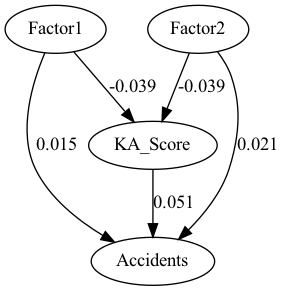


🔍 Performing Factor Analysis (NON-OCCU FACTORS)
Factor Loadings (Top 2 Factors):
    Factor 1  Factor 2
O1 -0.108886  0.450685
O2 -0.616830  0.006835
O3 -0.563883  0.462989
O4 -0.498027  0.356176
O5 -0.246009  0.262905
O6 -0.194489 -0.280183
O7 -0.840266 -0.188372
O8 -0.748057 -0.172634

📐 Performing SEM Analysis (NON-OCCU Factors to Risk-Taking Behavior)

SEM Estimates:
        lval  op       rval  Estimate  Std. Err   z-value   p-value
0   KA_Score   ~    Factor1 -0.041078  0.016512 -2.487866  0.012851
1   KA_Score   ~    Factor2  0.025637  0.040698  0.629924  0.528744
2  Accidents   ~   KA_Score  0.046298  0.038555  1.200825  0.229819
3  Accidents   ~    Factor1  0.003010  0.009007  0.334230  0.738206
4  Accidents   ~    Factor2 -0.019403  0.021878 -0.886894  0.375136
5   KA_Score  ~~   KA_Score  0.672565  0.068289  9.848858  0.000000
6  Accidents  ~~  Accidents  0.193954  0.019693  9.848858  0.000000


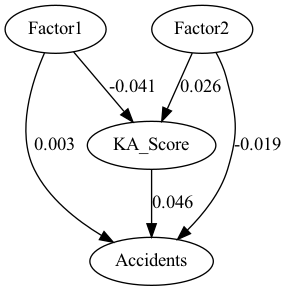

In [7]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler, LabelEncoder
from graphviz import Digraph
from semopy import Model
import pandas as pd
from IPython.display import Image, display

# --- FACTOR ANALYSIS AND SEM for OCCU and NON-OCCU FACTORS to Risk-Taking Behavior ---

def perform_factor_analysis(data, label):
    print(f"\n🔍 Performing Factor Analysis ({label.upper()} FACTORS)")
    clean_data = data.dropna()
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(clean_data)
    fa = FactorAnalysis(n_components=2, random_state=0)
    fa.fit(scaled_data)
    loadings = pd.DataFrame(fa.components_.T,
                            index=data.columns,
                            columns=['Factor 1', 'Factor 2'])
    print("Factor Loadings (Top 2 Factors):")
    print(loadings)
    return loadings

def perform_sem_analysis(data, label):
    print(f"\n📐 Performing SEM Analysis ({label.upper()} Factors to Risk-Taking Behavior)")
    df_sem = data.copy()
    for col in df_sem.columns:
        if df_sem[col].dtype == 'object':
            df_sem[col] = LabelEncoder().fit_transform(df_sem[col].astype(str))
    # SEM model to Risk-Taking (KA_Score) and Accidents
    model_desc = """
    KA_Score ~ Factor1 + Factor2
    Accidents ~ KA_Score + Factor1 + Factor2
    """
    sem_model = Model(model_desc)
    sem_model.load_dataset(df_sem)
    sem_model.fit()
    estimates = sem_model.inspect()
    print("\nSEM Estimates:")
    print(estimates[['lval', 'op', 'rval', 'Estimate', 'Std. Err', 'z-value', 'p-value']])
    return sem_model, estimates

def plot_sem_path(estimates, filename='sem_path_diagram'):
    edges = estimates[estimates['op'] == '~']
    dot = Digraph(format='png')
    dot.attr('node', shape='ellipse')
    variables = set(edges['lval']).union(set(edges['rval']))
    for var in variables:
        dot.node(var)
    for _, row in edges.iterrows():
        source = row['rval']
        target = row['lval']
        estimate = round(row['Estimate'], 3)
        dot.edge(source, target, label=str(estimate))
    dot.render(filename, view=False)
    display(Image(filename=f'{filename}.png'))

# Assuming `occu_factors`, `occu_data`, `nonoccu_factors`, `nonoccu_data` are defined

# 1. OCCU FACTORS
occu_loadings = perform_factor_analysis(occu_factors, 'OCCU')
occu_sem_data = occu_data.copy()
occu_sem_data['Factor1'] = occu_factors.dot(occu_loadings['Factor 1'])
occu_sem_data['Factor2'] = occu_factors.dot(occu_loadings['Factor 2'])
sem_model_occu, estimates_occu = perform_sem_analysis(occu_sem_data, 'OCCU')
plot_sem_path(estimates_occu, 'sem_path_occu')

# 2. NON-OCCU FACTORS
nonoccu_loadings = perform_factor_analysis(nonoccu_factors, 'NON-OCCU')
nonoccu_sem_data = nonoccu_data.copy()
nonoccu_sem_data['Factor1'] = nonoccu_factors.dot(nonoccu_loadings['Factor 1'])
nonoccu_sem_data['Factor2'] = nonoccu_factors.dot(nonoccu_loadings['Factor 2'])
sem_model_nonoccu, estimates_nonoccu = perform_sem_analysis(nonoccu_sem_data, 'NON-OCCU')
plot_sem_path(estimates_nonoccu, 'sem_path_nonoccu')
